Import evaluation metrics file

In [1]:
import eval as eval
import importlib

Write filename constants

In [2]:
UNFILTERED = '../fusion_moving_average/output.wav'
FILTERED = '../fusion/output_fused.wav'
TEST = '../data/test_rec.wav'

Draw histograms to observe differences and similiarities, ideally simple_classificaiton should look similiarily to test_rec

Highest amplitude: 32767, lowest amplitude: -32768


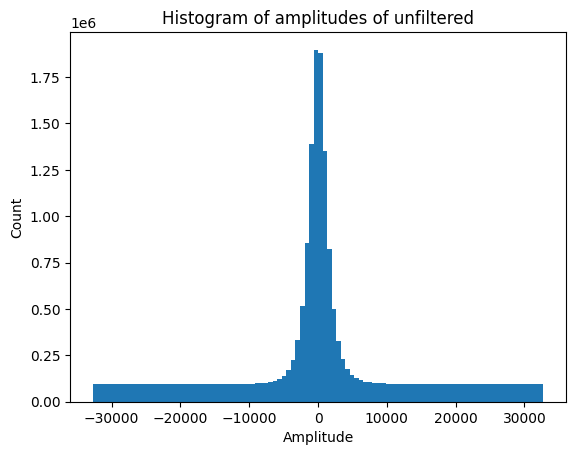

Highest amplitude: 32767, lowest amplitude: -32768


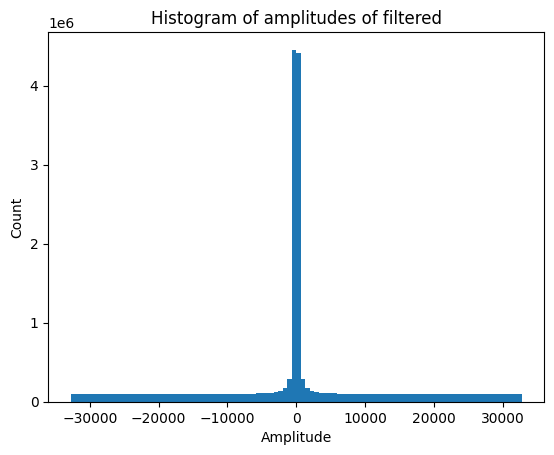

Highest amplitude: 32760, lowest amplitude: -32768


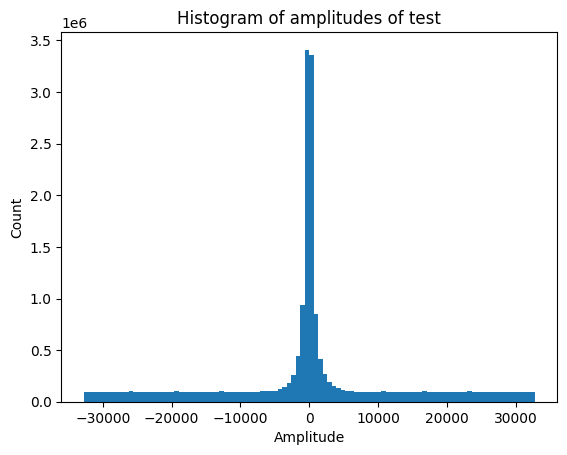

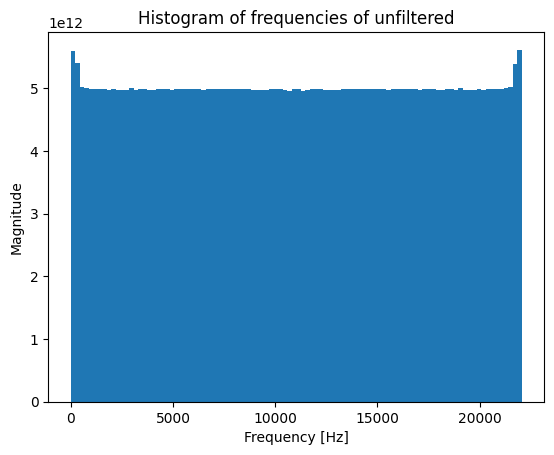

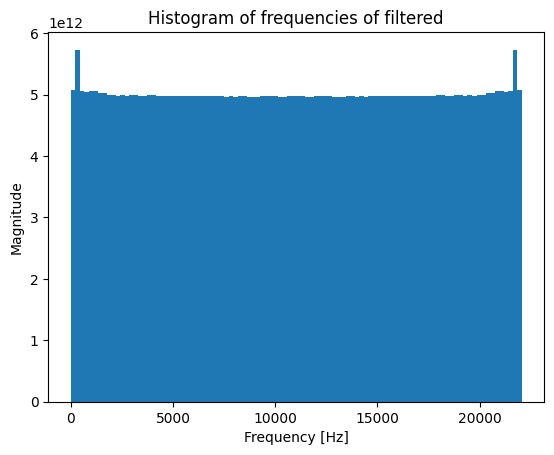

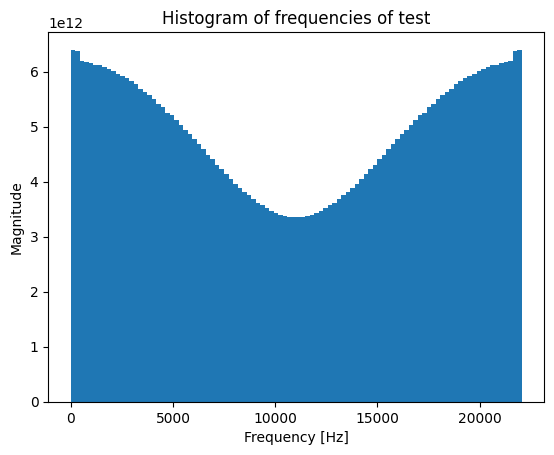

c:\Users\Joseph\Pycharm Projects\MTE546 Project\eval\eval.py:87: RuntimeWarning: invalid value encountered in log10
  volume_db = 20 * np.log10(np.abs(signal) + 10)


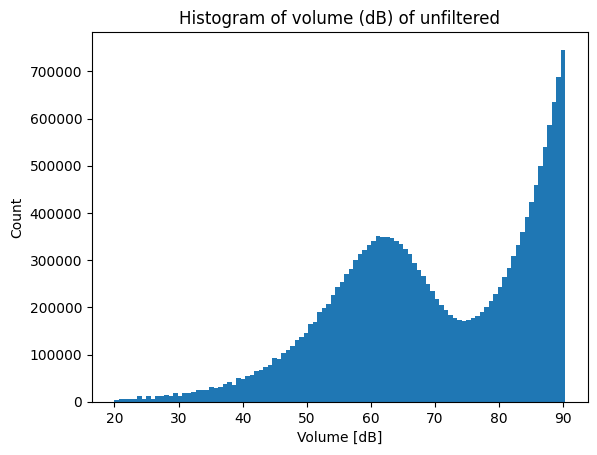

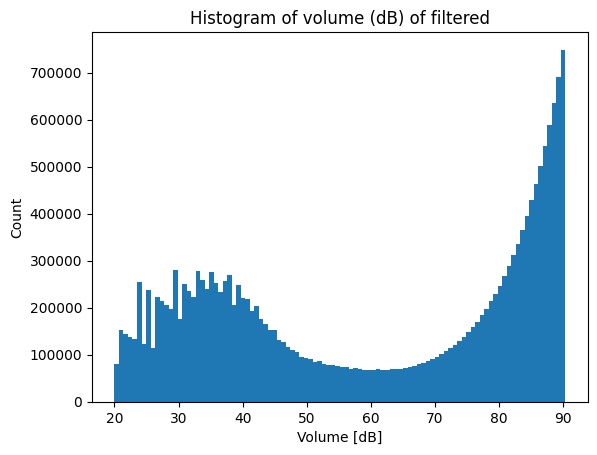

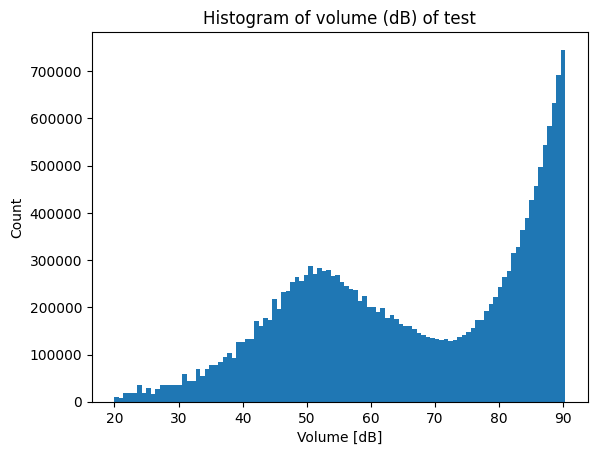

In [3]:
importlib.reload(eval)
eval.histogram_of_amplitudes(UNFILTERED, 'unfiltered')
eval.histogram_of_amplitudes(FILTERED, 'filtered')
eval.histogram_of_amplitudes(TEST, 'test')

eval.histogram_of_frequencies(UNFILTERED, 'unfiltered')
eval.histogram_of_frequencies(FILTERED, 'filtered')
eval.histogram_of_frequencies(TEST, 'test')

eval.histogram_of_volume_db(UNFILTERED, 'unfiltered')
eval.histogram_of_volume_db(FILTERED, 'filtered')
eval.histogram_of_volume_db(TEST, 'test')


As observed, across frequency, amplitude, and volume, the filtered wave is much closer than the unfiltered wave

Compare distances of amplitude histograms

In [4]:
importlib.reload(eval)
unfil = eval.compare_amp_hist(TEST, UNFILTERED)
fil = eval.compare_amp_hist(TEST, FILTERED)

improved = (unfil - fil) / unfil * 100
print(f'Improved by {improved:.2f}%')

amplitude hist diff: 6.069e+06 between ../data/test_rec.wav and ../fusion_moving_average/output.wav
amplitude hist diff: 4.481e+06 between ../data/test_rec.wav and ../fusion/output_fused.wav
Improved by 26.17%


Compare distance of frequency histograms

In [5]:
importlib.reload(eval)
unfiltered_dis = eval.compare_freq_hist(TEST, UNFILTERED)
filtered_dis = eval.compare_freq_hist(TEST, FILTERED)
reduction = round((unfiltered_dis - filtered_dis)*100/unfiltered_dis, 3)
print(f'Distance reduced by {reduction}% for frequency histogram')

frequency hist diff: 7.787e+13 between ../data/test_rec.wav and ../fusion_moving_average/output.wav
frequency hist diff: 7.713e+13 between ../data/test_rec.wav and ../fusion/output_fused.wav
Distance reduced by 0.942% for frequency histogram


Compare distance of volume histograms

In [6]:
importlib.reload(eval)
volume_unfiltered = eval.compare_db_hist(TEST, UNFILTERED)
volume_filtered = eval.compare_db_hist(TEST, FILTERED)

reduction = round((volume_unfiltered-volume_filtered)*100/volume_unfiltered, 3)
print(f'Volume(db) is reduced by {reduction}%')


c:\Users\Joseph\Pycharm Projects\MTE546 Project\eval\eval.py:238: RuntimeWarning: invalid value encountered in log10
  volume_db_one = 20 * np.log10(np.abs(signal_one)+10)
c:\Users\Joseph\Pycharm Projects\MTE546 Project\eval\eval.py:239: RuntimeWarning: invalid value encountered in log10
  volume_db_two = 20 * np.log10(np.abs(signal_two)+10)


volume hist diff: 6.056e+06 between ../data/test_rec.wav and ../fusion_moving_average/output.wav
volume hist diff: 9.834e+06 between ../data/test_rec.wav and ../fusion/output_fused.wav
Volume(db) is reduced by -62.38%


Use a moving window to compute distances of frequency, volume, and amplitude

In [7]:
importlib.reload(eval)
WINDOW_SIZE_SECONDS = 5
distance_amp, distance_freq, distance_vol = eval.moving_window_distance(TEST, UNFILTERED, WINDOW_SIZE_SECONDS)
distance_amp_fil, distance_freq_fil, distance_vol_fil = eval.moving_window_distance(TEST, FILTERED, WINDOW_SIZE_SECONDS)

freq_reduction = round((distance_freq - distance_freq_fil)*100/distance_freq, 3)
amp_reduction = round((distance_amp - distance_amp_fil)*100/distance_amp, 3)
print(f'Frequency distance reduced by {freq_reduction}% for moving frequency histogram')
print(f'Amplitude distance reduced by {amp_reduction}% for moving amplitude histogram')

c:\Users\Joseph\Pycharm Projects\MTE546 Project\eval\eval.py:279: RuntimeWarning: invalid value encountered in log10
  volume_db_one = 20 * np.log10(np.abs(window_one)+10)
c:\Users\Joseph\Pycharm Projects\MTE546 Project\eval\eval.py:280: RuntimeWarning: invalid value encountered in log10
  volume_db_two = 20 * np.log10(np.abs(window_two)+10)


Moving window distance of amplitude: 6.318e+06, frequency: 7.908e+08, volume: 3.855e+03 between ../data/test_rec.wav and ../fusion_moving_average/output.wav
Moving window distance of amplitude: 4.746e+06, frequency: 5.736e+08, volume: 6.988e+03 between ../data/test_rec.wav and ../fusion/output_fused.wav
Frequency distance reduced by 27.466% for moving frequency histogram
Amplitude distance reduced by 24.884% for moving amplitude histogram
